52 100


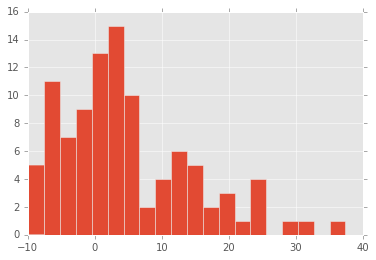

In [133]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from random import seed

seed(1234)

n = 100
p = 0.5
choice = np.random.binomial(1, p, size=(n,))
print(choice.sum(), n)
data = choice * np.random.normal(0, 5, size=(n,)) + (1-choice) * np.random.normal(10, 10, size=(n,))
_ = plt.hist(data, bins=20)

In [134]:
import bayespy


In [135]:
from bayespy.nodes import GaussianARD, Gamma
mu = GaussianARD(0, 1e-6)
tau = Gamma(1e-6, 1e-6)
y = GaussianARD(mu, tau, plates=(n,))

In [136]:
y.observe(data)

In [137]:
from bayespy.inference import VB
Q = VB(mu, tau, y)
Q

In [138]:
Q.update(repeat=20)

Iteration 1: loglike=-3.938639e+02 (0.004 seconds)
Iteration 2: loglike=-3.920722e+02 (0.003 seconds)
Iteration 3: loglike=-3.920721e+02 (0.002 seconds)
Converged at iteration 3.


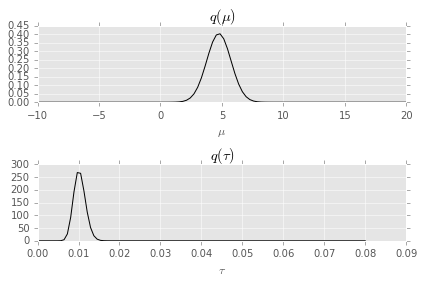

In [139]:
import bayespy.plot as bpplt
bpplt.pyplot.subplot(2, 1, 1)
bpplt.pdf(mu, np.linspace(-10, 20, num=100), color='k', name=r'\mu')
bpplt.pyplot.subplot(2, 1, 2)
bpplt.pdf(tau, np.linspace(1e-6, 0.08, num=100), color='k', name=r'\tau')
bpplt.pyplot.tight_layout()
bpplt.pyplot.show()